In [1]:
import numpy as np
import roadrunner
import pandas as pd
import matplotlib.pyplot as plt

SEED=1
np.random.seed(seed=SEED)

# Model system parameters
MODEL_SBML_FILE = "model_mRNA_self_reg.xml"
DURATION = 16

# Synthetic dataset parameters
NOISE = 0.02 # % Gaussian noise (range is 0-1)
N_PTS = DURATION * 10000 + 1
T_PTS = [0,0.0001,0.1,0.2,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7,8,9,10,11,12,13,14,15]

In [2]:
def gaussian_noise(x,std,mu=0):
    noise = np.random.normal(mu, std, size = x.shape)
    x_noisy = x + noise
    return x_noisy

rr = roadrunner.RoadRunner(MODEL_SBML_FILE)
rr.integrator.absolute_tolerance = 5e-10
rr.integrator.relative_tolerance = 1e-8

rr.resetAll()
res = rr.simulate(0, DURATION, N_PTS)
# ignore the first timepoint (i.e. t=0)
ts_data = res[:, 0]
prod_traj = res[:, 1]

idxs = [list(ts_data).index(x) for x in T_PTS]
select_prod_traj = prod_traj[idxs]

std = NOISE * select_prod_traj
noisy_data = gaussian_noise(select_prod_traj, std)

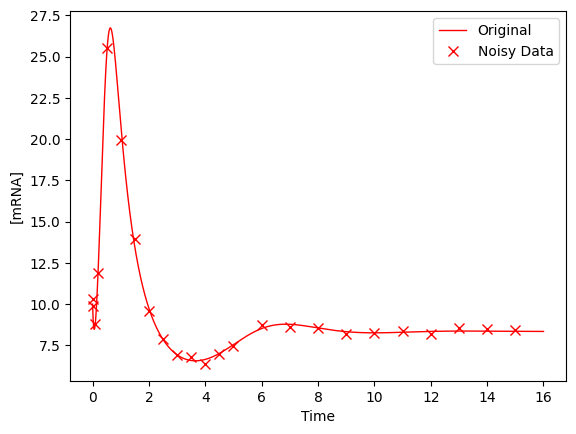

In [3]:
plt.figure(dpi=100)
plt.plot(ts_data, prod_traj, 'r-', lw=1, label="Original")
plt.plot(T_PTS, noisy_data, 'rx', markersize=7, label="Noisy Data")
plt.legend()
plt.xlabel("Time");
plt.ylabel("[mRNA]");

In [4]:
N_DATA = len(T_PTS)
# Save for later
df = pd.DataFrame()

df["observableId"] = ["observable_mRNA"] * N_DATA
df["simulationConditionId"] = ["simCondition"] * N_DATA
df["measurement"] = noisy_data
df["time"] = T_PTS
#df["noiseParameters"] = [0] * N_DATA
df.to_csv("measurementData_mRNA_self_reg.tsv", sep="\t", index=False)
df

,observableId,simulationConditionId,measurement,time
0,observable_mRNA,simCondition,10.324869,0.0000
1,observable_mRNA,simCondition,9.871730,0.0001
2,observable_mRNA,simCondition,8.798297,0.1000
3,observable_mRNA,simCondition,11.883889,0.2000
4,observable_mRNA,simCondition,25.510520,0.5000
5,observable_mRNA,simCondition,19.936534,1.0000
6,observable_mRNA,simCondition,13.917308,1.5000
7,observable_mRNA,simCondition,9.592836,2.0000
8,observable_mRNA,simCondition,7.908767,2.5000
9,observable_mRNA,simCondition,6.893649,3.0000


In [5]:
!petablint -h

/home/cil8/anaconda3/envs/bayes/lib/python3.12/site-packages/petab/v2/__init__.py:12: UserWarning: Support for PEtab2.0 and all of petab.v2 is experimental and subject to changes!
  warn(
usage: petablint [-h] [-v] [-s SBML_FILE_NAME] [-o OBSERVABLE_FILE_NAME]
                 [-m MEASUREMENT_FILE_NAME] [-c CONDITION_FILE_NAME]
                 [-p PARAMETER_FILE_NAME] [--vis VISUALIZATION_FILE_NAME]
                 [-y YAML_FILE_NAME_DEPRECATED]
                 [yaml_file_name]

Check if a set of files adheres to the PEtab format.

positional arguments:
  yaml_file_name        PEtab YAML problem filename

options:
  -h, --help            show this help message and exit
  -v, --verbose         More verbose output
  -y YAML_FILE_NAME_DEPRECATED, --yaml YAML_FILE_NAME_DEPRECATED
                        PEtab YAML problem filename. *DEPRECATED* pass the
                        file name as positional argument instead.

Check individual files *DEPRECATED*. Please contact us via https://g

In [6]:
!petablint ./mRNA_self_reg.yaml

/home/cil8/anaconda3/envs/bayes/lib/python3.12/site-packages/petab/v2/__init__.py:12: UserWarning: Support for PEtab2.0 and all of petab.v2 is experimental and subject to changes!
  warn(
